<a href="https://colab.research.google.com/github/usaidh08/bangkit/blob/main/Data_Preparation_and_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle API and Importing libraries

In [ ]:
!pip install kaggle -q
!pip install split-folders -q
!pip install python-resize-image -q

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usaid08","key":"b5f662f9856851c312f2ef40008687fe"}'}

In [ ]:
# Kaggle API Set Up

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
from resizeimage import resizeimage
import splitfolders
import random

# Import Datasets from Kaggle

**Dataset

https://www.kaggle.com/datasets/kmader/food41

Classes that we collect from the dataset:
- Donuts
- French Fries
- Hamburger
- Hot Dog
- Pizza
- Spaghetti
- Takoyaki


In [ ]:
# Download dataset:
!kaggle datasets download -d kmader/food41

100% 5.29G/5.30G [01:07<00:00, 181MB/s]
100% 5.30G/5.30G [01:07<00:00, 84.5MB/s]


# Extract & Split the datasets

Each class obtained from each dataset has 1000 images. We split each class into 700 for Training set, 150 for Validation set, and 150 for Test set.

In [ ]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/dev
!mkdir dataset/test

### Extract the training set

## Dataset Extract and split the dataset

The data set need to be split manually

In [ ]:
# make a temporary data

!mkdir dirty_data

### Extract the classes

In [ ]:
!unzip -j -q food41.zip "images/donuts/*" -d "dirty_data/donuts"
!unzip -j -q food41.zip "images/french_fries/*" -d "dirty_data/french_fries"
!unzip -j -q food41.zip "images/hamburger/*" -d "dirty_data/hamburger"
!unzip -j -q food41.zip "images/hot_dog/*" -d "dirty_data/hot_dog"
!unzip -j -q food41.zip "images/pizza/*" -d "dirty_data/pizza"
!unzip -j -q food41.zip "images/spaghetti_bolognese/*" -d "dirty_data/spaghetti"
!unzip -j -q food41.zip "images/takoyaki/*" -d "dirty_data/takoyaki"

In [ ]:
# Splitting data into 150 each for dev and test. The remainder will be training set

splitfolders.fixed("dirty_data", output="temp_folder", seed=42, fixed=(150, 150))

Copying files: 7000 files [00:04, 1567.58 files/s]


In [ ]:
# Cleaning up the temporary folders

!mv temp_folder/train/* dataset/train/
!mv temp_folder/val/* dataset/dev/
!mv temp_folder/test/* dataset/test/
!rm -rf temp_folder
!rm -rf dirty_data

### Function to show random Images

In [ ]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

### Resizing Images into 224 X 224 Pixels

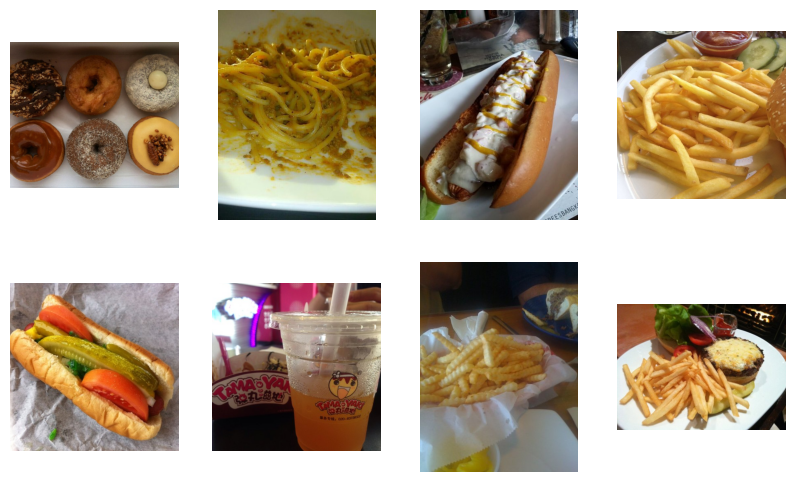

In [ ]:
# Before Resize

show_random_images_from("dataset/*/*/*", seed=380)

In [ ]:
for i, img in enumerate(glob("dataset/*/*/*")):
    try:
      image = Image.open(img)
      cover = resizeimage.resize_cover(image, [224, 224])
      cover.save(img)
    except:
      print(img, " ----- error converting, skipped.")

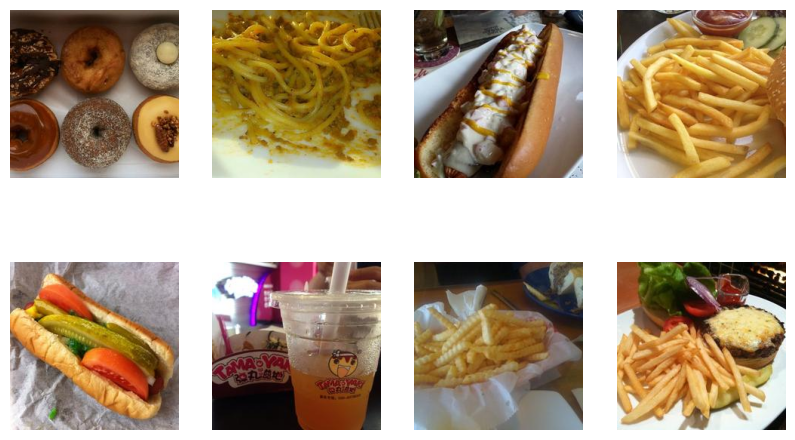

In [ ]:
# After Resize

show_random_images_from("dataset/*/*/*", seed=380)

# Save the cleaned dataset to gdrive

In [ ]:
# Zip the dataset folder

!zip -r -q cleaned_dataset_v2.zip "/content/dataset/"

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Copy the cleaned dataset to gdrive

!cp -r "cleaned_dataset_v2.zip" "drive/MyDrive/Capstone Project/dataset/"

In [ ]:
# Check the saved dataset

!ls "drive/MyDrive/Capstone Project/dataset/"

cleaned_dataset_v2.zip


In [ ]:
# Flush data and unmount

drive.flush_and_unmount()

Import dataset

In [ ]:
!pip install gdown -q

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pathlib
import numpy as np
import matplotlib.pylab as plt

In [ ]:
print(tf. __version__)


2.12.0


In [ ]:
# download dataset

!gdown 'https://drive.google.com/drive/folders/1h04rMaaLHUa9gOkKxAgXR8MOa5YVSlli' -O cleaned_dataset_v2.zip
!unzip -q cleaned_dataset_v2.zip
!mv /content/content/dataset /content
!rm -rf /content/content

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1h04rMaaLHUa9gOkKxAgXR8MOa5YVSlli
To: /content/cleaned_dataset_v2.zip
1.09MB [00:00, 54.5MB/s]
[cleaned_dataset_v2.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of cleaned_dataset_v2.zip or
        cleaned_dataset_v2.zip.zip, and cannot find cleaned_dataset_v2.zip.ZIP, period.
mv: cannot stat '/content/content/dataset': No such file or directory


In [ ]:
dataset_dir = "/content/dataset"
train_dir = "/content/dataset/train"
valid_dir = "/content/dataset/dev"
test_dir = "/content/dataset/test"

In [ ]:
handle_base, pixels, FV_SIZE = ("mobilenet_v2", 224, 1280)
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)

print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
BATCH_SIZE = 64

In [ ]:
# Datagen
train_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen =  ImageDataGenerator(rescale=1./255)

# Flow training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

# Flow validation data generator
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)

# Flow test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)

Found 4900 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())

# Create a labels.txt file with the class names

with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
feature_extractor = hub.KerasLayer(
    MODULE_HANDLE,
    input_shape=IMAGE_SIZE + (3,),
    output_shape=[FV_SIZE],
    trainable=False
)

In [ ]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 7)                 8967      
                                                                 
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from keras import callbacks

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=3,
    restore_best_weights=True
)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/10
77/77 [==============================] - 404s 5s/step - loss: 0.8947 - accuracy: 0.7069 - val_loss: 0.4672 - val_accuracy: 0.8619
Epoch 2/10
77/77 [==============================] - 393s 5s/step - loss: 0.4561 - accuracy: 0.8571 - val_loss: 0.3634 - val_accuracy: 0.8924
Epoch 3/10
77/77 [==============================] - 402s 5s/step - loss: 0.3790 - accuracy: 0.8763 - val_loss: 0.3298 - val_accuracy: 0.8933
Epoch 4/10
77/77 [==============================] - 382s 5s/step - loss: 0.3460 - accuracy: 0.8867 - val_loss: 0.3034 - val_accuracy: 0.9029
Epoch 5/10
77/77 [==============================] - 348s 5s/step - loss: 0.3177 - accuracy: 0.8959 - val_loss: 0.2980 - val_accuracy: 0.8981
Epoch 6/10
77/77 [==============================] - 349s 5s/step - loss: 0.2898 - accuracy: 0.9082 - val_loss: 0.2922 - val_accuracy: 0.8971
Epoch 7/10
77/77 [==============================] - 367s 5s/step - loss: 0.2703 - accuracy: 0.9151 - val_loss: 0.2788 - val_accuracy: 0.9019
Epoch 8/10
77

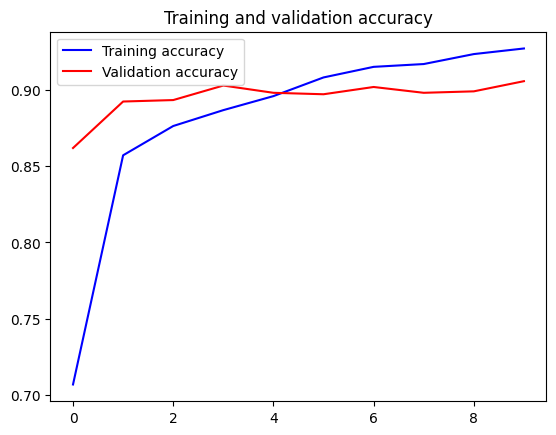

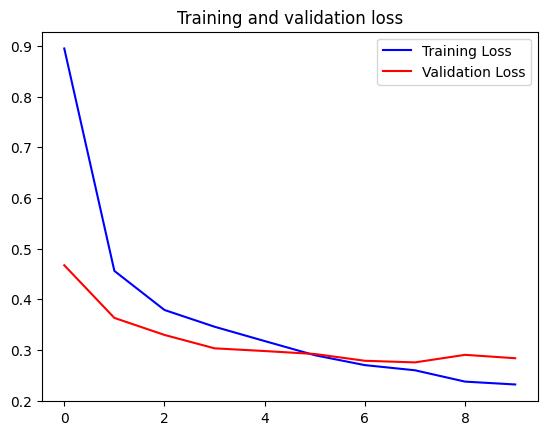

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate final score on Validation and Testing data

scores = model.evaluate(validation_generator)
scores = model.evaluate(test_generator)

17/17 [==============================] - 58s 3s/step - loss: 0.3156 - accuracy: 0.8981


In [ ]:
model.save('model.h5')
model.save('model')
!zip -r 'model.zip' 'model'

  adding: model/ (stored 0%)
  adding: model/keras_metadata.pb (deflated 81%)
  adding: model/saved_model.pb (deflated 92%)
  adding: model/assets/ (stored 0%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 78%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model/fingerprint.pb (stored 0%)


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('model')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

# Invoke the converter to generate the TFLite model
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

2516168

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=class_names))

17/17 [==============================] - 56s 3s/step
Classification Report
              precision    recall  f1-score   support

      donuts       0.89      0.85      0.87       150
french_fries       0.94      0.90      0.92       150
   hamburger       0.89      0.86      0.87       150
     hot_dog       0.87      0.83      0.85       150
       pizza       0.97      0.94      0.96       150
   spaghetti       0.96      0.95      0.95       150
    takoyaki       0.79      0.96      0.87       150

    accuracy                           0.90      1050
   macro avg       0.90      0.90      0.90      1050
weighted avg       0.90      0.90      0.90      1050



In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.4/244.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 684.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation:

In [ ]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2023-12-21 19:14:13.268267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 19:14:13.268346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 19:14:13.270920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 19:14:16.100530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line

In [ ]:
!zip submission.zip *.bin model.json

	zip warning: name not matched: *.bin
	zip warning: name not matched: model.json

zip error: Nothing to do! (submission.zip)
